In [81]:
#Import data science libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score,
    recall_score, f1_score,
    roc_auc_score, confusion_matrix,
    classification_report
)
from sklearn.ensemble import GradientBoostingClassifier

In [82]:
#Load dataset
df = pd.read_excel("/content/drug abuse and risk factors among women.xlsx")

In [83]:
df.head()

,alcohol,cigarettes,cocaine,crack,heroin,marijuana,meth,pain_relievers,age,education,father,mother,income,race,employment
0,yes,no,no,no,no,no,no,yes,65 years or older,College graduate,participant is 18 or older,participant is 18 or older,More than 75000,Asian,Participant is employed full-time
1,yes,no,no,no,no,no,no,yes,18-25 years old,Did not graduate high school,participant is 18 or older,participant is 18 or older,Less than 20000,White,Other (incl. not in labor force)
2,yes,no,no,no,no,yes,no,no,18-25 years old,"Some college, or Associate degree",participant is 18 or older,participant is 18 or older,More than 75000,White,Participant is unemployed
3,no,no,no,no,no,no,no,yes,26-34 years old,College graduate,participant is 18 or older,participant is 18 or older,Between 20000 and 49000,Asian,Participant is employed full-time
4,no,no,no,no,no,no,no,no,35-49 years old,College graduate,participant is 18 or older,participant is 18 or older,Between 20000 and 49000,Black,Other (incl. not in labor force)


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29348 entries, 0 to 29347
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   alcohol         29348 non-null  object
 1   cigarettes      29348 non-null  object
 2   cocaine         29348 non-null  object
 3   crack           29348 non-null  object
 4   heroin          29348 non-null  object
 5   marijuana       29348 non-null  object
 6   meth            29348 non-null  object
 7   pain_relievers  29348 non-null  object
 8   age             29348 non-null  object
 9   education       29348 non-null  object
 10  father          29348 non-null  object
 11  mother          29348 non-null  object
 12  income          29348 non-null  object
 13  race            29348 non-null  object
 14  employment      29348 non-null  object
dtypes: object(15)
memory usage: 3.4+ MB


In [85]:
df.describe()

,alcohol,cigarettes,cocaine,crack,heroin,marijuana,meth,pain_relievers,age,education,father,mother,income,race,employment
count,29348,29348,29348,29348,29348,29348,29348,29348,29348,29348,29348,29348,29348,29348,29348
unique,2,2,2,2,2,2,2,2,6,5,4,4,4,7,5
top,yes,no,no,no,no,no,no,yes,18-25 years old,"Some college, or Associate degree",participant is 18 or older,participant is 18 or older,More than 75000,White,Participant is employed full-time
freq,21149,16606,26449,28748,28955,22676,28210,15865,7183,8149,22807,22807,10288,16746,10615


In [86]:
df.isnull().sum()

,0
alcohol,0
cigarettes,0
cocaine,0
crack,0
heroin,0
marijuana,0
meth,0
pain_relievers,0
age,0
education,0


In [87]:
duplicates = df.duplicated().sum()
print(duplicates)

20322


In [88]:
# NOTE: Duplicates are not deleted because personal identifying information
# has been removed from the dataset. As a result, multiple participants
# might have identical records.

In [90]:
#Display the unique values for all the columns

for col in df.columns:
    print(f"{col}: {df[col].unique()}\n")

alcohol: ['yes' 'no']

cigarettes: ['no' 'yes']

cocaine: ['no' 'yes']

crack: ['no' 'yes']

heroin: ['no' 'yes']

marijuana: ['no' 'yes']

meth: ['no' 'yes']

pain_relievers: ['yes' 'no']

age: ['65 years or older' '18-25 years old ' '26-34 years old '
 '35-49 years old' '12-17 years old ' '50-64 years old']

education: ['College graduate' 'Did not graduate high school'
 'Some college, or Associate degree' 'High School graduate'
 '12 to 17 year olds']

father: ['participant is 18 or older' 'Yes, the father is in the household'
 'No, the father is not in the household'
 'Doesn’t know whether or not father is present']

mother: ['participant is 18 or older' 'Yes, the mother is in the household'
 'No, the mother is not in the household'
 'Does not know whether or not mother is present']

income: ['More than 75000' 'Less than 20000' 'Between 20000 and 49000'
 'Between 50000 and 74999 ']

race: ['Asian' 'White' 'Black' 'Hispanic' 'Multi-Racial' 'Native American'
 'Native Hawaiian/Pacific I

In [91]:
#Remove all trailing whitespaces and convert characters to lower case

df["age"] = df["age"].str.rstrip()
df["education"] = df["education"].str.lower()
df["father"] = df["father"].str.lower()
df["mother"] = df["mother"].str.lower()
df["income"] = df["income"].str.rstrip().str.lower()
df["race"] = df["race"].str.lower()
df["employment"] = df["employment"].str.rstrip().str.lower()

In [92]:
"""Display all unique values for each column to ascertain
that trailing whitespaces have been removed and characters
have been coverted to lower case"""

for col in df.columns:
    print(f"{col}: {df[col].unique()}\n")

alcohol: ['yes' 'no']

cigarettes: ['no' 'yes']

cocaine: ['no' 'yes']

crack: ['no' 'yes']

heroin: ['no' 'yes']

marijuana: ['no' 'yes']

meth: ['no' 'yes']

pain_relievers: ['yes' 'no']

age: ['65 years or older' '18-25 years old' '26-34 years old' '35-49 years old'
 '12-17 years old' '50-64 years old']

education: ['college graduate' 'did not graduate high school'
 'some college, or associate degree' 'high school graduate'
 '12 to 17 year olds']

father: ['participant is 18 or older' 'yes, the father is in the household'
 'no, the father is not in the household'
 'doesn’t know whether or not father is present']

mother: ['participant is 18 or older' 'yes, the mother is in the household'
 'no, the mother is not in the household'
 'does not know whether or not mother is present']

income: ['more than 75000' 'less than 20000' 'between 20000 and 49000'
 'between 50000 and 74999']

race: ['asian' 'white' 'black' 'hispanic' 'multi-racial' 'native american'
 'native hawaiian/pacific islan

In [93]:
"""Apply binary encoding since categorical variables
("alcohol", "cigarettes", "cocaine",
"crack", "heroin", "marijuana", "meth",
"pain_relievers"is binary)
are binary"""

mapping = {"yes":1, "no":0}
df[["alcohol", "cigarettes", "cocaine", "crack", "heroin", "marijuana", "meth", "pain_relievers"]] = df[
    ["alcohol", "cigarettes", "cocaine", "crack", "heroin", "marijuana", "meth", "pain_relievers"]].replace(mapping)

/tmp/ipython-input-8507462.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ["alcohol", "cigarettes", "cocaine", "crack", "heroin", "marijuana", "meth", "pain_relievers"]].replace(mapping)


In [94]:
"""Count the number of rows in column 'father' with response:
'does not know whether or not father is present'.
"""

df["father"].value_counts()

,count
father,
participant is 18 or older,22807
"yes, the father is in the household",4672
"no, the father is not in the household",1864
doesn’t know whether or not father is present,5


In [95]:
"""Drop rows in column 'father' with response:
'doesn’t know whether or not father is present'.
"""

df = df[df["father"] != "doesn’t know whether or not father is present"]

In [96]:
"""Count the number of rows in column 'mother' with response:
'doesn’t know whether or not mother is present'.
"""

df["mother"].value_counts()

,count
mother,
participant is 18 or older,22807
"yes, the mother is in the household",5976
"no, the mother is not in the household",558
does not know whether or not mother is present,2


In [97]:
"""Drop rows in column 'mother' with response:
'does not know whether or not mother is present'.
"""

df = df[df["mother"] != "does not know whether or not mother is present"]

In [98]:
"""Apply binary encoding since categorical variables
("alcohol", "cigarettes", "cocaine",
"crack", "heroin", "marijuana", "meth",
"pain_relievers"is binary)
are binary"""

mapping = {"yes":1, "no":0}
df[["alcohol", "cigarettes", "cocaine", "crack", "heroin", "marijuana", "meth", "pain_relievers"]] = df[
    ["alcohol", "cigarettes", "cocaine", "crack", "heroin", "marijuana", "meth", "pain_relievers"]].replace(mapping)

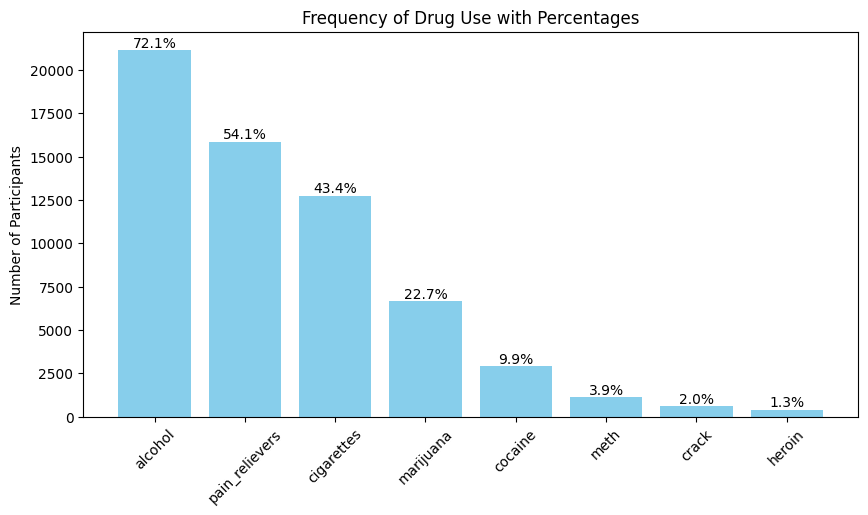

In [99]:
#Display a bar plot to show the frequency of drug use

drug_cols = ["alcohol", "cigarettes", "cocaine", "crack", "heroin", "marijuana",
             "meth", "pain_relievers"]

drug_counts = df[drug_cols].sum().sort_values(ascending=False)

total_participants = len(df)

plt.figure(figsize=(10,5))
bars = plt.bar(drug_counts.index, drug_counts.values, color='skyblue')

for bar in bars:
    height = bar.get_height()
    pct = height / total_participants * 100
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, f'{pct:.1f}%',
             ha='center', va='bottom', fontsize=10)

plt.title("Frequency of Drug Use with Percentages")
plt.ylabel("Number of Participants")
plt.xticks(rotation=45)
plt.show()

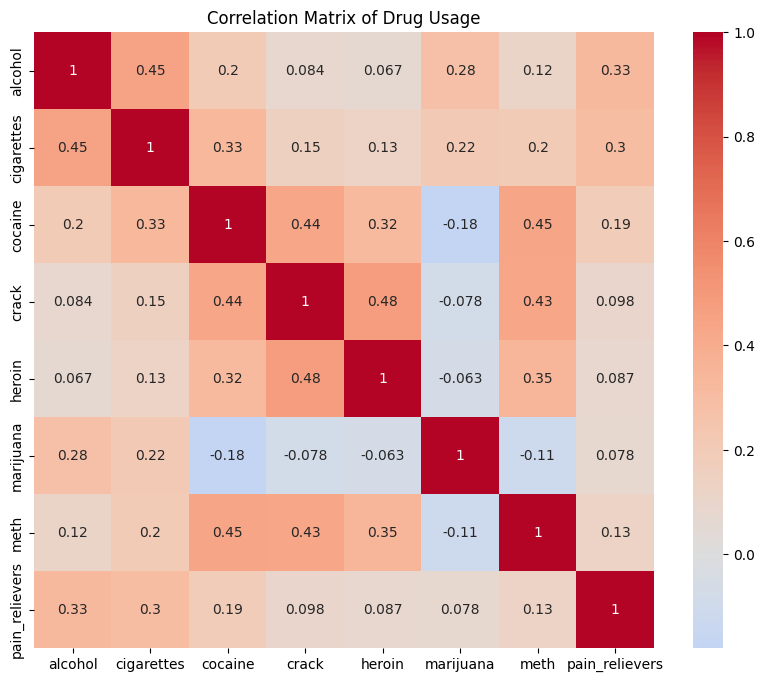

In [100]:
# Compute correlation between drug usage columns and show using a heatmap

corr_matrix = df[drug_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Drug Usage")
plt.show()

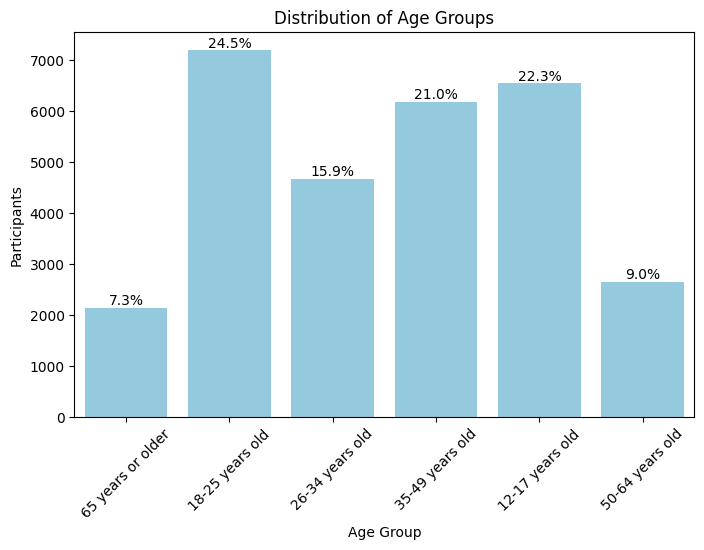

In [101]:
#Display a bar plot to show the distribution of age groups

plt.figure(figsize = (8, 5))

ax = sns.countplot(data = df, x = "age", color = "skyblue")

total = len(df)
for p in ax.patches:
    height = p.get_height()
    pct = height / total * 100
    ax.annotate(f'{pct:.1f}%', (p.get_x() + p.get_width()/2, height),
                ha='center', va='bottom', fontsize=10)

plt.title("Distribution of Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Participants")
plt.xticks(rotation = 45)
plt.show()

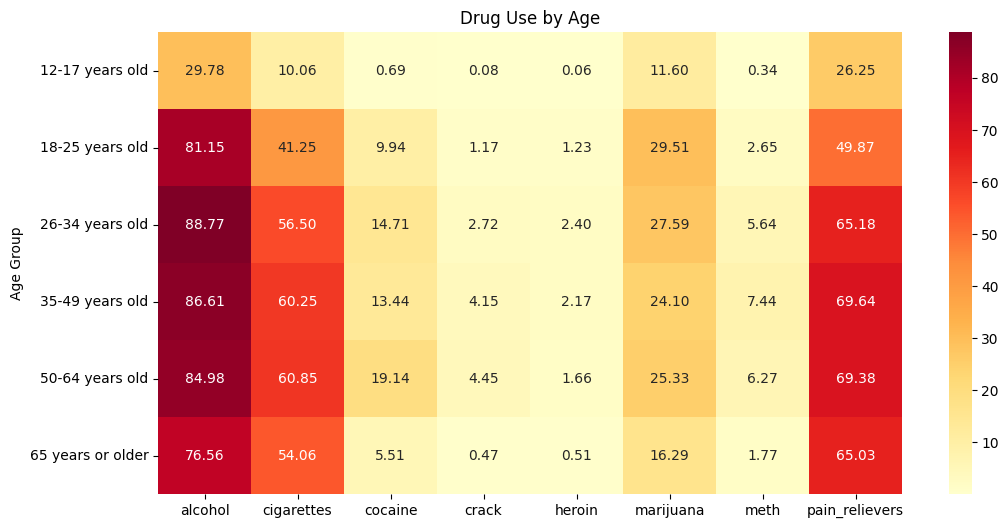

In [102]:
#Display a heatmap to show the use of drugs by age group

age_drug_usage = df.groupby("age")[drug_cols].mean() * 100

age_order = ['12-17 years old', '18-25 years old', '26-34 years old',
             '35-49 years old', '50-64 years old', '65 years or older']
age_drug_usage = age_drug_usage.reindex(age_order)

plt.figure(figsize = (12, 6))
sns.heatmap(age_drug_usage, annot = True, cmap = "YlOrRd", fmt = ".2f")
plt.title("Drug Use by Age")
plt.ylabel("Age Group")
plt.show()

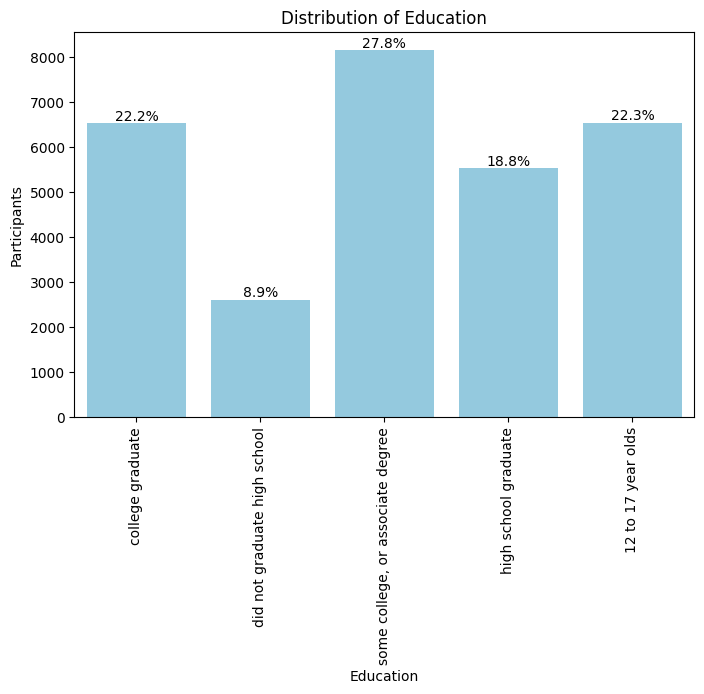

In [103]:
#Display a bar plot to show the distribution of education among the participants

plt.figure(figsize = (8, 5))

ax = sns.countplot(data = df, x = "education", color = "skyblue")

total = len(df)
for p in ax.patches:
    height = p.get_height()
    pct = height / total * 100
    ax.annotate(f'{pct:.1f}%', (p.get_x() + p.get_width()/2, height),
                ha='center', va='bottom', fontsize=10)

plt.title("Distribution of Education")
plt.xlabel("Education")
plt.ylabel("Participants")
plt.xticks(rotation = 90)
plt.show()

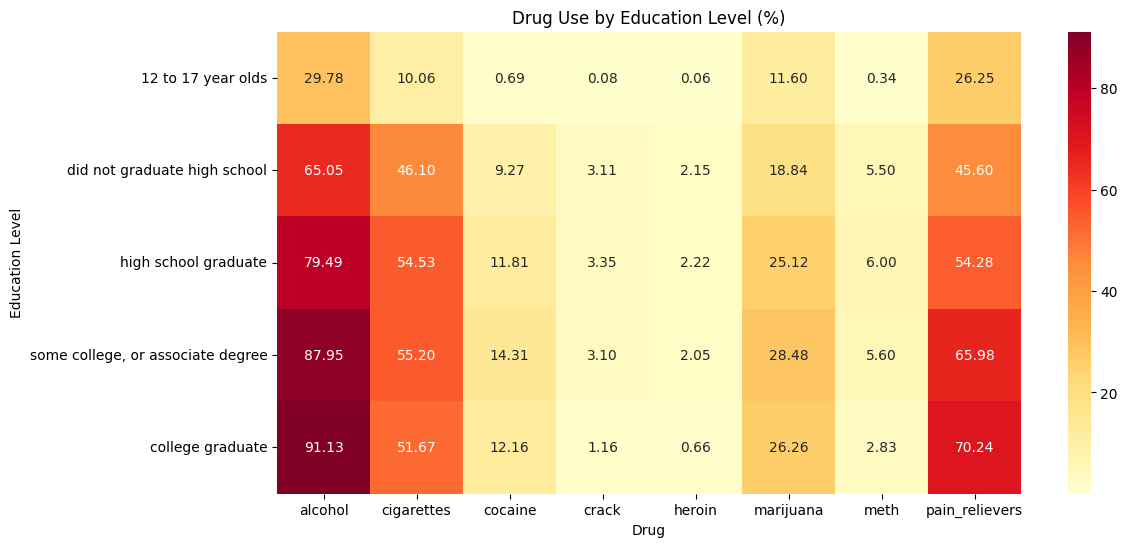

In [104]:
""" Display a heatmap to show the distribution of drug use across different
educational level"""

edu_drug_usage = df.groupby("education")[drug_cols].mean() * 100

# Reorder education levels
edu_order = ["12 to 17 year olds", "did not graduate high school",
             "high school graduate", "some college, or associate degree",
             "college graduate"]
edu_drug_usage = edu_drug_usage.reindex(edu_order)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(edu_drug_usage, annot=True, cmap="YlOrRd", fmt=".2f")
plt.title("Drug Use by Education Level (%)")
plt.ylabel("Education Level")
plt.xlabel("Drug")
plt.show()


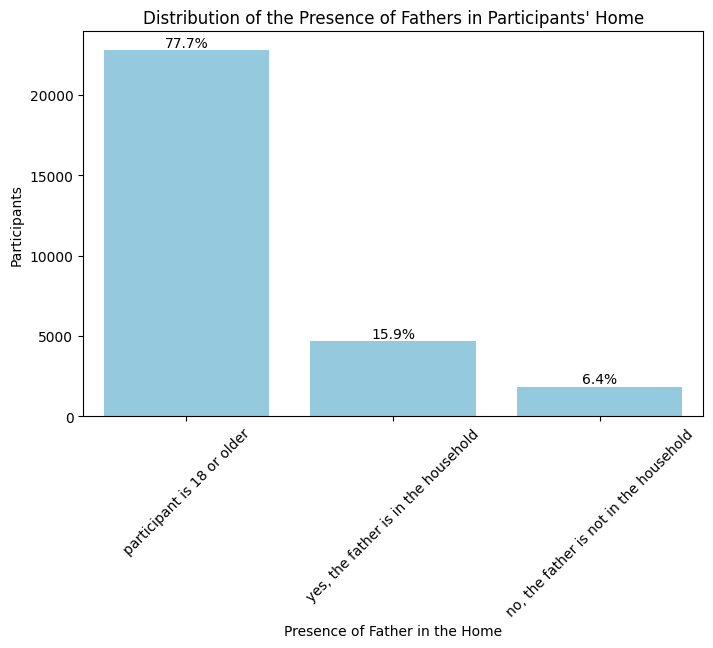

In [105]:
"""Display a bar plot to show the distribution of participants with fathers
in their home"""

plt.figure(figsize = (8, 5))

ax = sns.countplot(data = df, x = "father", color = "skyblue")

total = len(df)
for p in ax.patches:
    height = p.get_height()
    pct = height / total * 100
    ax.annotate(f'{pct:.1f}%', (p.get_x() + p.get_width()/2, height),
                ha='center', va='bottom', fontsize=10)

plt.title("Distribution of the Presence of Fathers in Participants' Home")
plt.xlabel("Presence of Father in the Home")
plt.ylabel("Participants")
plt.xticks(rotation = 45)
plt.show()

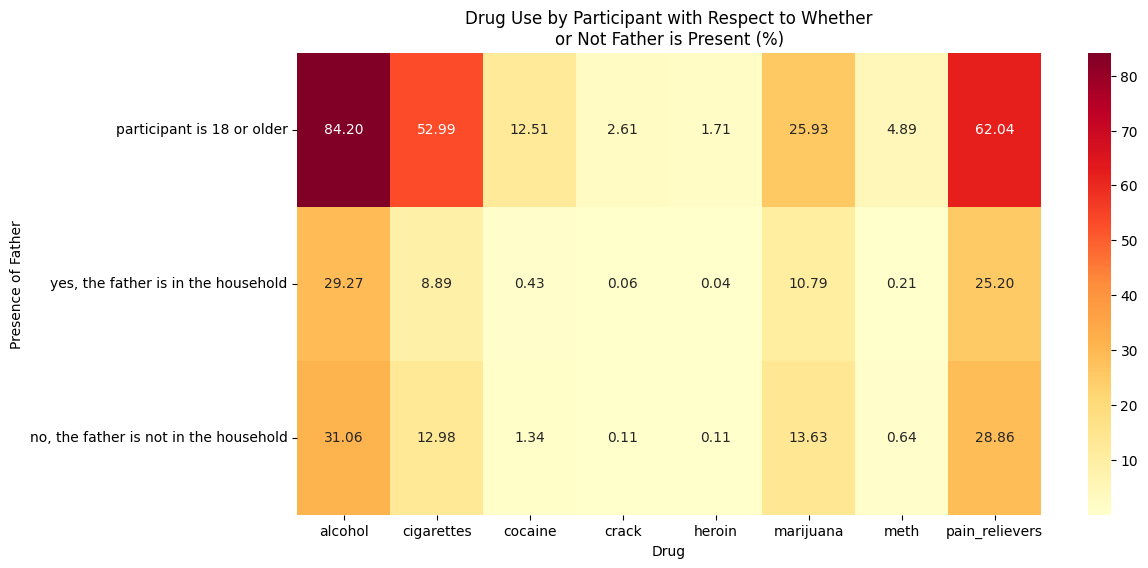

In [106]:
"""Display a heatmap to show the distribution of the presence of fathers in
participants home"""

father_presence_drug_usage = df.groupby("father")[drug_cols].mean() * 100

#Reorder mother presence
father_order = ["participant is 18 or older",
                "yes, the father is in the household",
                "no, the father is not in the household"]
father_presence_drug_usage = father_presence_drug_usage.reindex(father_order)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(father_presence_drug_usage, annot=True, cmap="YlOrRd", fmt=".2f")
plt.title("""Drug Use by Participant with Respect to Whether
or Not Father is Present (%)""")
plt.ylabel("Presence of Father")
plt.xlabel("Drug")
plt.show()

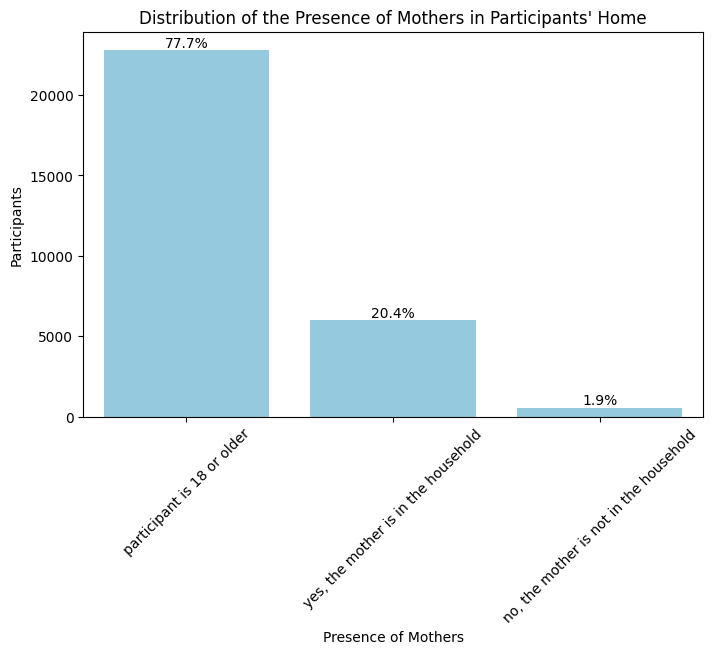

In [107]:
"""Display a bar plot to show the distribution of the presence of mothers in
participants' home"""

plt.figure(figsize = (8, 5))

ax = sns.countplot(data = df, x = "mother", color = "skyblue")

total = len(df)
for p in ax.patches:
    height = p.get_height()
    pct = height / total * 100
    ax.annotate(f'{pct:.1f}%', (p.get_x() + p.get_width()/2, height),
                ha='center', va='bottom', fontsize=10)

plt.title("Distribution of the Presence of Mothers in Participants' Home")
plt.xlabel("Presence of Mothers")
plt.ylabel("Participants")
plt.xticks(rotation = 45)
plt.show()

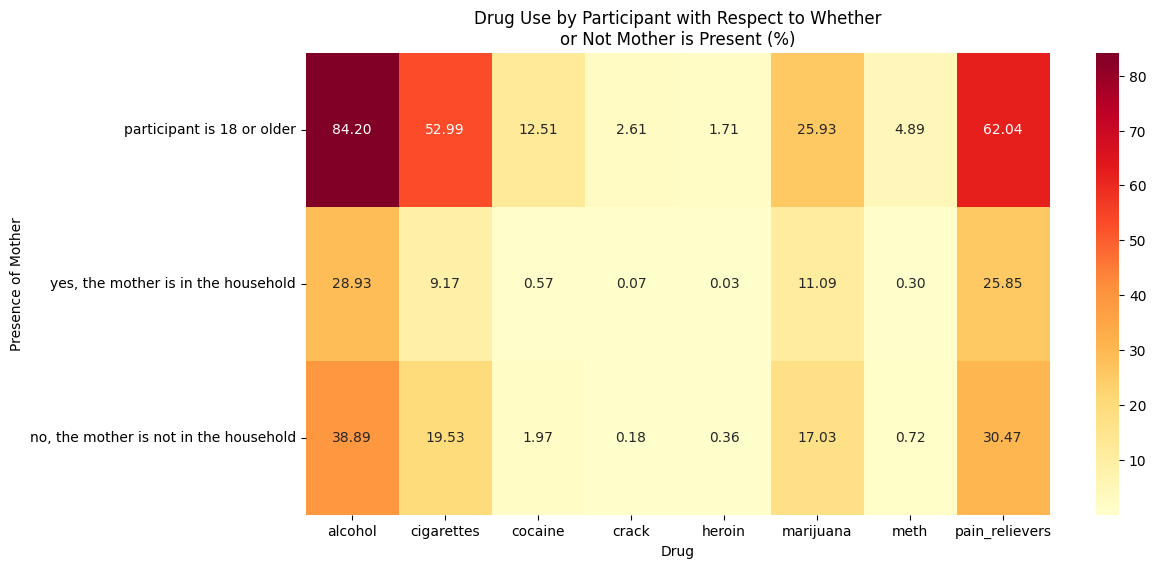

In [108]:
"""Display a heatmap to show the distribution of the presence of mothers in
participants' home and drug usage"""

mother_presence_drug_usage = df.groupby("mother")[drug_cols].mean() * 100

# Reorder mother presence
mother_order = ["participant is 18 or older",
                "yes, the mother is in the household",
                "no, the mother is not in the household"]
mother_presence_drug_usage = mother_presence_drug_usage.reindex(mother_order)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(mother_presence_drug_usage, annot=True, cmap="YlOrRd", fmt=".2f")
plt.title("""Drug Use by Participant with Respect to Whether
or Not Mother is Present (%)""")
plt.ylabel("Presence of Mother")
plt.xlabel("Drug")
plt.show()

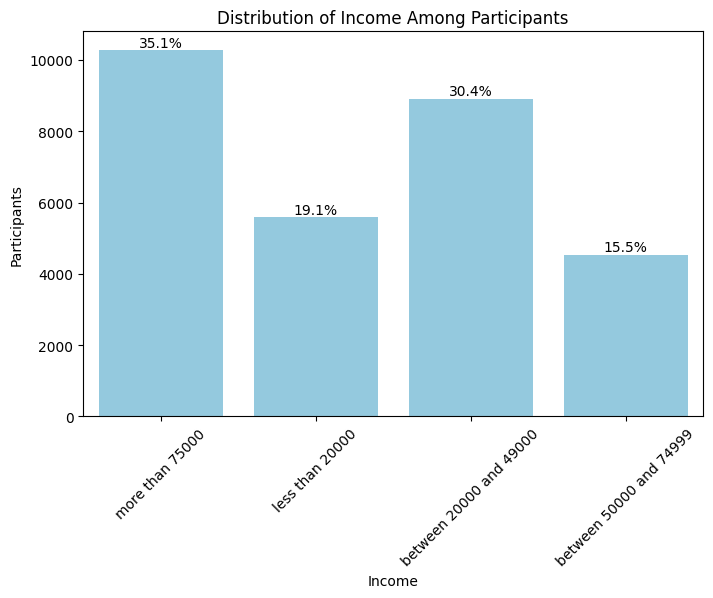

In [109]:
"""Display a bar plot to show the distribution of income among the participants"""

plt.figure(figsize = (8, 5))

ax = sns.countplot(data = df, x = "income", color = "skyblue")

total = len(df)
for p in ax.patches:
    height = p.get_height()
    pct = height / total * 100
    ax.annotate(f'{pct:.1f}%', (p.get_x() + p.get_width()/2, height),
                ha='center', va='bottom', fontsize=10)

plt.title("Distribution of Income Among Participants")
plt.xlabel("Income")
plt.ylabel("Participants")
plt.xticks(rotation = 45)
plt.show()

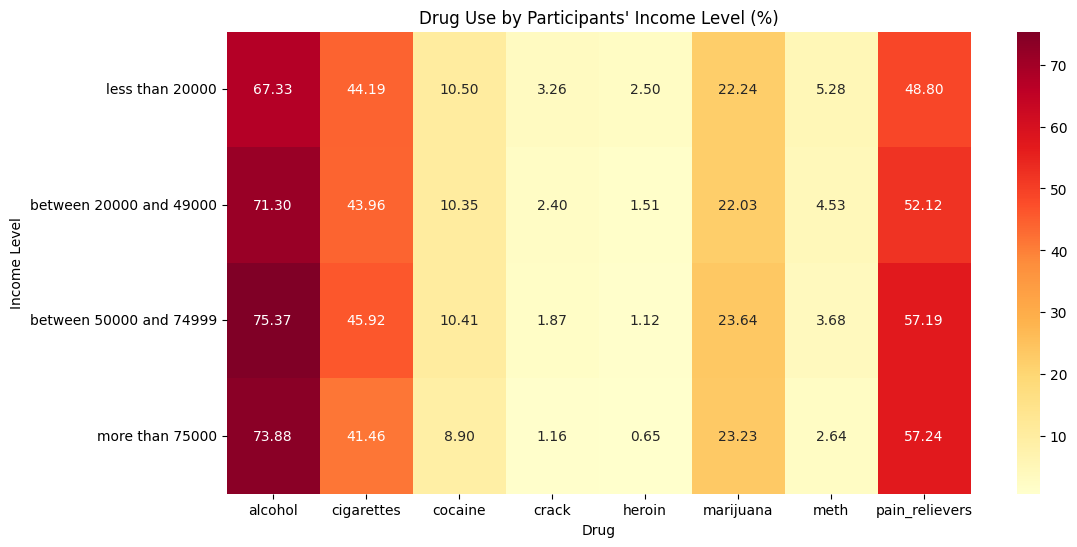

In [110]:
"""Display a heatmap to show the distribution of income among participants
 and drug usage"""

income_drug_usage = df.groupby("income")[drug_cols].mean() * 100

# Reorder participants' income level
income_order = ["less than 20000",
                "between 20000 and 49000",
                "between 50000 and 74999",
                "more than 75000"
                ]
income_drug_usage = income_drug_usage.reindex(income_order)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(income_drug_usage, annot=True, cmap="YlOrRd", fmt=".2f")
plt.title("Drug Use by Participants' Income Level (%)")
plt.ylabel("Income Level")
plt.xlabel("Drug")
plt.show()

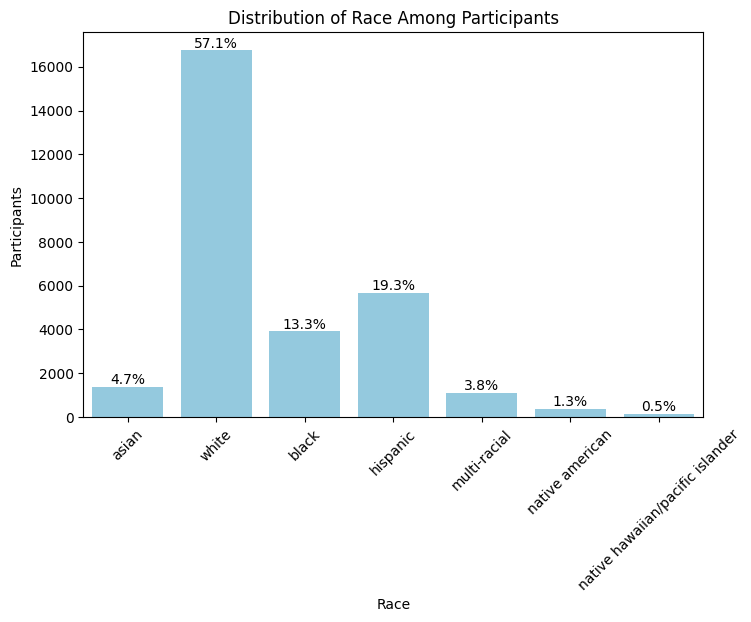

In [111]:
"""Display a bar plot to show the distribution of race among the participants"""

plt.figure(figsize = (8, 5))

ax = sns.countplot(data = df, x = "race", color = "skyblue")

total = len(df)
for p in ax.patches:
    height = p.get_height()
    pct = height / total * 100
    ax.annotate(f'{pct:.1f}%', (p.get_x() + p.get_width()/2, height),
                ha='center', va='bottom', fontsize=10)

plt.title("Distribution of Race Among Participants")
plt.xlabel("Race")
plt.ylabel("Participants")
plt.xticks(rotation = 45)
plt.show()

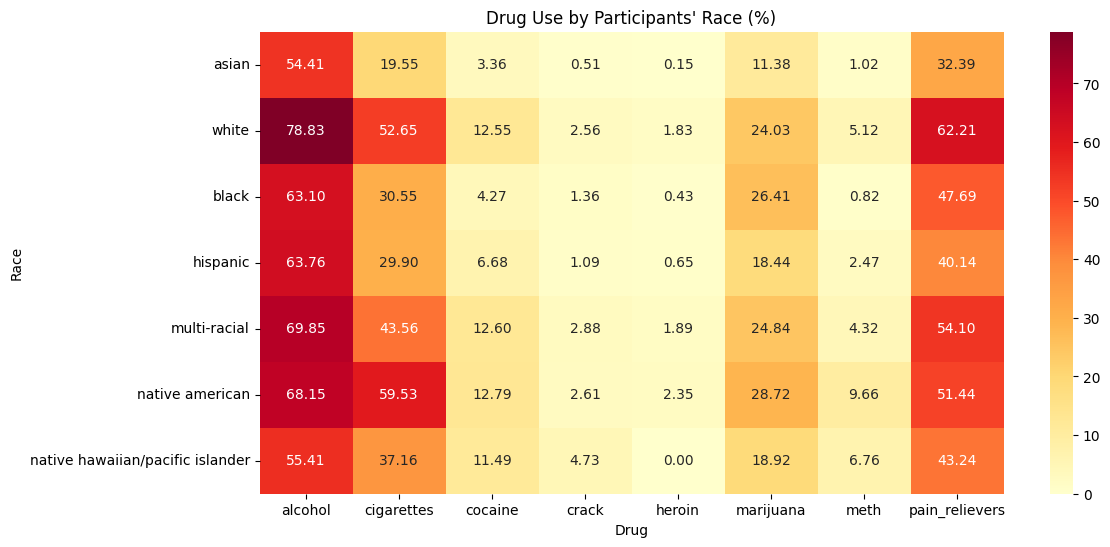

In [112]:
"""Display a heatmap to show the distribution of Race among participants
and drug usage"""

race_drug_usage = df.groupby("race")[drug_cols].mean() * 100

# Randomly arrange participants' race
race_order = ["asian", "white", "black", "hispanic", "multi-racial",
              "native american", "native hawaiian/pacific islander"]
race_drug_usage = race_drug_usage.reindex(race_order)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(race_drug_usage, annot=True, cmap="YlOrRd", fmt=".2f")
plt.title("Drug Use by Participants' Race (%)")
plt.ylabel("Race")
plt.xlabel("Drug")
plt.show()

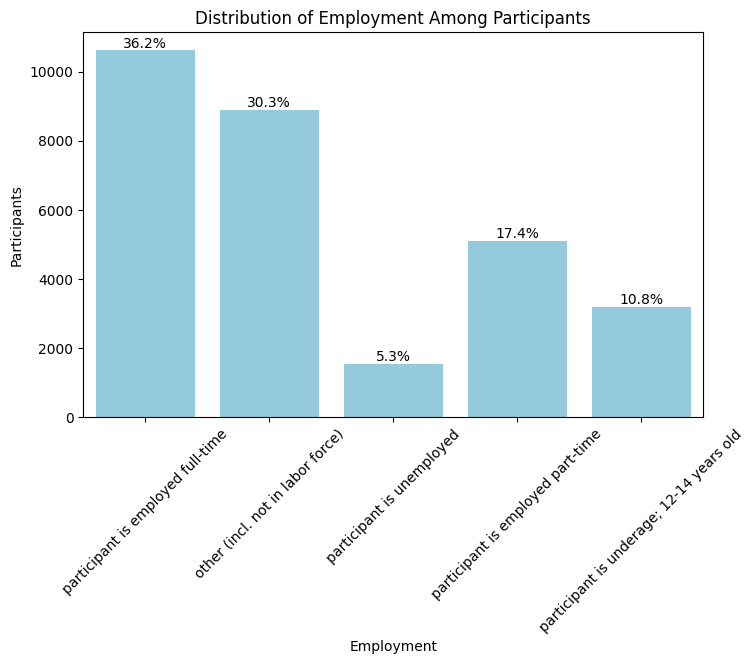

In [113]:
"""Display a bar plot to show the distribution of employment among
 the participants"""

plt.figure(figsize = (8, 5))

ax = sns.countplot(data = df, x = "employment", color = "skyblue")

total = len(df)
for p in ax.patches:
    height = p.get_height()
    pct = height / total * 100
    ax.annotate(f'{pct:.1f}%', (p.get_x() + p.get_width()/2, height),
                ha='center', va='bottom', fontsize=10)

plt.title("Distribution of Employment Among Participants")
plt.xlabel("Employment")
plt.ylabel("Participants")
plt.xticks(rotation = 45)
plt.show()

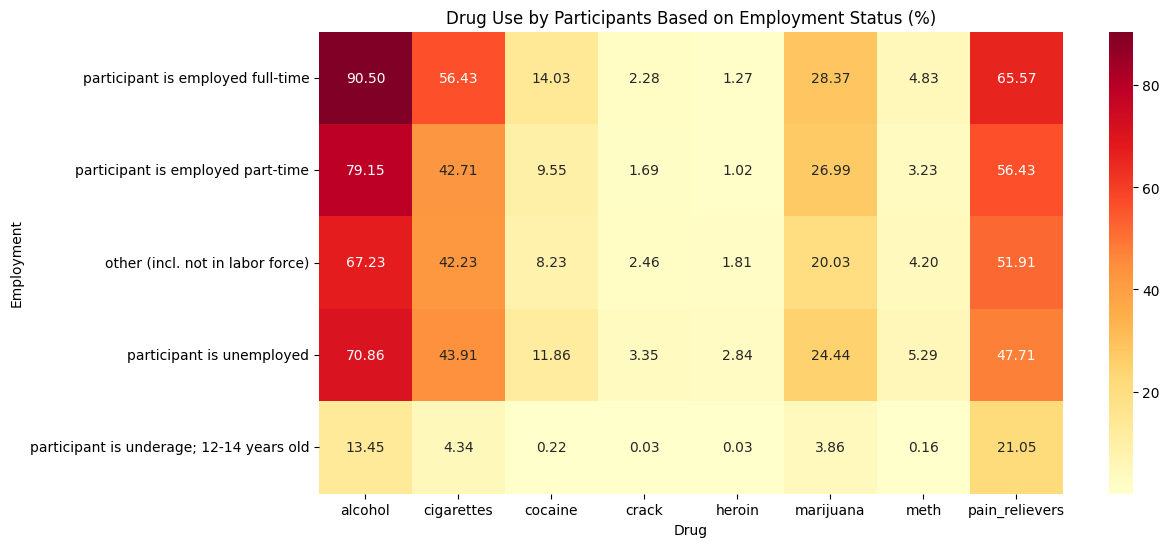

In [114]:
"""Display a heatmap to show the distribution of Employment among participants
and drug usage"""

employment_drug_usage = df.groupby("employment")[drug_cols].mean() * 100

# Reorder participants' employment status
employment_order = ["participant is employed full-time",
                    "participant is employed part-time",
                    "other (incl. not in labor force)",
                    "participant is unemployed",
                    "participant is underage; 12-14 years old"]
employment_drug_usage = employment_drug_usage.reindex(employment_order)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(employment_drug_usage, annot=True, cmap="YlOrRd", fmt=".2f")
plt.title("Drug Use by Participants Based on Employment Status (%)")
plt.ylabel("Employment")
plt.xlabel("Drug")
plt.show()

In [115]:
#Apply label encoding to age since it is ordinal

mapping = {"12-17 years old":1, "18-25 years old":2, "26-34 years old":3,
           "35-49 years old":4, "50-64 years old":5, "65 years or older":6}
df["age"] = df["age"].replace(mapping)

/tmp/ipython-input-3841032325.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["age"] = df["age"].replace(mapping)


In [116]:
df.head()

,alcohol,cigarettes,cocaine,crack,heroin,marijuana,meth,pain_relievers,age,education,father,mother,income,race,employment
0,1,0,0,0,0,0,0,1,6,college graduate,participant is 18 or older,participant is 18 or older,more than 75000,asian,participant is employed full-time
1,1,0,0,0,0,0,0,1,2,did not graduate high school,participant is 18 or older,participant is 18 or older,less than 20000,white,other (incl. not in labor force)
2,1,0,0,0,0,1,0,0,2,"some college, or associate degree",participant is 18 or older,participant is 18 or older,more than 75000,white,participant is unemployed
3,0,0,0,0,0,0,0,1,3,college graduate,participant is 18 or older,participant is 18 or older,between 20000 and 49000,asian,participant is employed full-time
4,0,0,0,0,0,0,0,0,4,college graduate,participant is 18 or older,participant is 18 or older,between 20000 and 49000,black,other (incl. not in labor force)


In [117]:
#Apply label encoding to education since it is ordinal

mapping = {"did not graduate high school": 1, "high school graduate":2,
           "some college, or associate degree":3,"college graduate":4,
           "12 to 17 year olds":0}
df["education"] = df["education"].replace(mapping)

/tmp/ipython-input-3616808201.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["education"] = df["education"].replace(mapping)


In [118]:
df.head()

,alcohol,cigarettes,cocaine,crack,heroin,marijuana,meth,pain_relievers,age,education,father,mother,income,race,employment
0,1,0,0,0,0,0,0,1,6,4,participant is 18 or older,participant is 18 or older,more than 75000,asian,participant is employed full-time
1,1,0,0,0,0,0,0,1,2,1,participant is 18 or older,participant is 18 or older,less than 20000,white,other (incl. not in labor force)
2,1,0,0,0,0,1,0,0,2,3,participant is 18 or older,participant is 18 or older,more than 75000,white,participant is unemployed
3,0,0,0,0,0,0,0,1,3,4,participant is 18 or older,participant is 18 or older,between 20000 and 49000,asian,participant is employed full-time
4,0,0,0,0,0,0,0,0,4,4,participant is 18 or older,participant is 18 or older,between 20000 and 49000,black,other (incl. not in labor force)


In [119]:
#Apply label encoding to income as it is ordinal

mapping = {"less than 20000":1, "between 20000 and 49000":2,
           "between 50000 and 74999":3, "more than 75000":4}
df["income"] = df["income"].replace(mapping)

/tmp/ipython-input-1134118533.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["income"] = df["income"].replace(mapping)


In [120]:
df.head()

,alcohol,cigarettes,cocaine,crack,heroin,marijuana,meth,pain_relievers,age,education,father,mother,income,race,employment
0,1,0,0,0,0,0,0,1,6,4,participant is 18 or older,participant is 18 or older,4,asian,participant is employed full-time
1,1,0,0,0,0,0,0,1,2,1,participant is 18 or older,participant is 18 or older,1,white,other (incl. not in labor force)
2,1,0,0,0,0,1,0,0,2,3,participant is 18 or older,participant is 18 or older,4,white,participant is unemployed
3,0,0,0,0,0,0,0,1,3,4,participant is 18 or older,participant is 18 or older,2,asian,participant is employed full-time
4,0,0,0,0,0,0,0,0,4,4,participant is 18 or older,participant is 18 or older,2,black,other (incl. not in labor force)


In [121]:
#Apply one-hot encoding to "father" as it is a nominal categorical variable

mapping = {"participant is 18 or older": "neither_yes/no_participant_>=_18",
           "yes, the father is in the household": "yes",
           "no, the father is not in the household":"no"}
df["father"] = df["father"].replace(mapping)
df = pd.get_dummies(df, columns=["father"], dtype=int)

In [122]:
df.head()

,alcohol,cigarettes,cocaine,crack,heroin,marijuana,meth,pain_relievers,age,education,mother,income,race,employment,father_neither_yes/no_participant_>=_18,father_no,father_yes
0,1,0,0,0,0,0,0,1,6,4,participant is 18 or older,4,asian,participant is employed full-time,1,0,0
1,1,0,0,0,0,0,0,1,2,1,participant is 18 or older,1,white,other (incl. not in labor force),1,0,0
2,1,0,0,0,0,1,0,0,2,3,participant is 18 or older,4,white,participant is unemployed,1,0,0
3,0,0,0,0,0,0,0,1,3,4,participant is 18 or older,2,asian,participant is employed full-time,1,0,0
4,0,0,0,0,0,0,0,0,4,4,participant is 18 or older,2,black,other (incl. not in labor force),1,0,0


In [123]:
#Apply one-hot encoding to employment as it is a nominal categorical variable

mapping = {"Participant is employed full-time":"employed full-time",
           "Participant is employed part-time":"employed part-time",
           "Other (incl. not in labor force)":"other",
           "Participant is unemployed":"unemployed",
           "Participant is underage; 12-14 years old":"underage"
           }
df["employment"] = df["employment"].replace(mapping)
df = pd.get_dummies(df, columns = ["employment"], dtype = int)

In [124]:
df.head()

,alcohol,cigarettes,cocaine,crack,heroin,marijuana,meth,pain_relievers,age,education,...,income,race,father_neither_yes/no_participant_>=_18,father_no,father_yes,employment_other (incl. not in labor force),employment_participant is employed full-time,employment_participant is employed part-time,employment_participant is underage; 12-14 years old,employment_participant is unemployed
0,1,0,0,0,0,0,0,1,6,4,...,4,asian,1,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,1,2,1,...,1,white,1,0,0,1,0,0,0,0
2,1,0,0,0,0,1,0,0,2,3,...,4,white,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,3,4,...,2,asian,1,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,4,4,...,2,black,1,0,0,1,0,0,0,0


In [125]:
# Apply one-hot encoding to race as it a nominal categorical variable

df = pd.get_dummies(df, columns=["race"], dtype=int)

In [126]:
df.head()

,alcohol,cigarettes,cocaine,crack,heroin,marijuana,meth,pain_relievers,age,education,...,employment_participant is employed part-time,employment_participant is underage; 12-14 years old,employment_participant is unemployed,race_asian,race_black,race_hispanic,race_multi-racial,race_native american,race_native hawaiian/pacific islander,race_white
0,1,0,0,0,0,0,0,1,6,4,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,2,1,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,1,0,0,2,3,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,3,4,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,4,4,...,0,0,0,0,1,0,0,0,0,0


In [127]:
#Apply one-hot encoding to "mother" as it is a nominal categorical variable

mapping = {"participant is 18 or older": "neither_yes/no_participant_>=_18",
           "yes, the mother is in the household": "yes",
           "no, the mother is not in the household":"no"}
df["mother"] = df["mother"].replace(mapping)
df = pd.get_dummies(df, columns=["mother"], dtype=int)

In [128]:
df.head()

,alcohol,cigarettes,cocaine,crack,heroin,marijuana,meth,pain_relievers,age,education,...,race_asian,race_black,race_hispanic,race_multi-racial,race_native american,race_native hawaiian/pacific islander,race_white,mother_neither_yes/no_participant_>=_18,mother_no,mother_yes
0,1,0,0,0,0,0,0,1,6,4,...,1,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,1,2,1,...,0,0,0,0,0,0,1,1,0,0
2,1,0,0,0,0,1,0,0,2,3,...,0,0,0,0,0,0,1,1,0,0
3,0,0,0,0,0,0,0,1,3,4,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,4,4,...,0,1,0,0,0,0,0,1,0,0


In [129]:
for target in drug_cols:
    print(f"Predicting {target.upper()} use ")

    x = df.drop(columns = [target])
    y = df[target]

    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size = 0.2, random_state = 42, stratify = y
    )

    gb = GradientBoostingClassifier(random_state = 42)
    gb.fit(x_train, y_train)

    y_pred = gb.predict(x_test)
    y_proba = gb.predict_proba(x_test)[:, 1]

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, zero_division=0))
    print("Recall:", recall_score(y_test, y_pred, zero_division=0))
    print("F1-Score:", f1_score(y_test, y_pred, zero_division=0))
    print("ROC-AUC:", roc_auc_score(y_test, y_proba))

    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))


Predicting ALCOHOL use 
Accuracy: 0.8440960981427841
Precision: 0.8750848608282417
Recall: 0.9141843971631206
F1-Score: 0.8942074228234478
ROC-AUC: 0.9073789443773737

Confusion Matrix:
 [[1087  552]
 [ 363 3867]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.66      0.70      1639
           1       0.88      0.91      0.89      4230

    accuracy                           0.84      5869
   macro avg       0.81      0.79      0.80      5869
weighted avg       0.84      0.84      0.84      5869

Predicting CIGARETTES use 
Accuracy: 0.771170557164764
Precision: 0.7449228269699432
Recall: 0.7194978422910946
F1-Score: 0.7319896228297745
ROC-AUC: 0.8637370785614014

Confusion Matrix:
 [[2692  628]
 [ 715 1834]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      3320
           1       0.74      0.72      0.73      2549

    accuracy                 